In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.io as sio

In [3]:
from bicme.tests.case_normal import CaseNormal
from bicme.samplers import MWGSampler
from bicme.samplers import RosenthalAdaptiveSampler
from bicme.proposals import RWMHProposal
from bicme.display import quick_display
from bicme.display import DisplayResults

In [4]:
mat1 = sio.loadmat('../../Tests/Data/NormData.mat')
data = np.array(mat1['data']).flatten()
np.random.seed(1)
cn = CaseNormal(data)

##### Run Metropolis_within_Gibbs sampler with scaling during burn-in; proposal-  random-walk Metropoli-Hastings.

In [5]:
X0 = [2, 10]
N1 = 10000 # samples required
M1 = 1000 # notify every #
lag = 50 # adjustment lag
# Initialise Proposer
proposer1 = RWMHProposal(cn.logPosterior, verbose=True)
# Initialise Sampler
sampler1 = MWGSampler(samples_draw=N1, notify_every=M1, 
                     burnin_fraction=0.5, burnin_lag=lag,
                     model=cn.logPosterior, 
                     proposal=proposer1.propose_component,
                     verbose=True)  
sampler1.acceptance_limits = [0.3, 0.7]
sampler1.scale = 0.5
# Sample
#np.random.seed(1)
S1 = sampler1.sample_component(X0)

Sampler initialised...
Iteration 50; Acceptance: 0.580000; Scale factor 1.000000: not changed
Iteration 50; Acceptance: 0.420000; Scale factor 1.000000: not changed
Iteration 100; Acceptance: 0.520000; Scale factor 1.000000: not changed
Iteration 100; Acceptance: 0.420000; Scale factor 1.000000: not changed
Iteration 150; Acceptance: 0.580000; Scale factor 1.000000: not changed
Iteration 150; Acceptance: 0.600000; Scale factor 1.000000: not changed
Iteration 200; Acceptance: 0.580000; Scale factor 1.000000: not changed
Iteration 200; Acceptance: 0.460000; Scale factor 1.000000: not changed
Iteration 250; Acceptance: 0.620000; Scale factor 1.000000: not changed
Iteration 250; Acceptance: 0.360000; Scale factor 1.000000: not changed
Iteration 300; Acceptance: 0.480000; Scale factor 1.000000: not changed
Iteration 300; Acceptance: 0.580000; Scale factor 1.000000: not changed
Iteration 350; Acceptance: 0.480000; Scale factor 1.000000: not changed
Iteration 350; Acceptance: 0.380000; Scale 

In [6]:
print('MEP index = ', S1.MEP_index)
print('MEP = ', S1.MEP)
print('MEP pars=', S1.MEP_samples)

MEP index =  2988
MEP =  -1118.23291213
MEP pars= [-0.2599631   9.65978537]


In [7]:
#quick_display(S1, burnin=N//2)

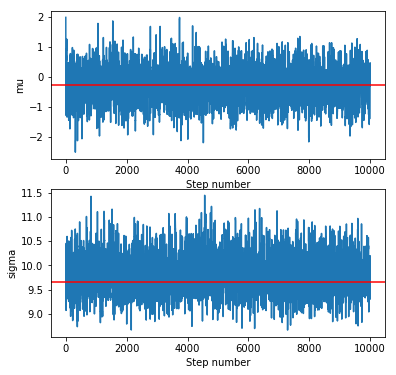

In [8]:
display1 = DisplayResults(S1, burnin=S1.N//2, names=['mu', 'sigma'])
#display.show_labels = False
display1.chains()

In [9]:
#display1.distributions()

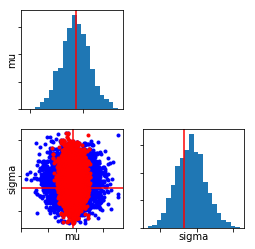

In [9]:
display1.corner()

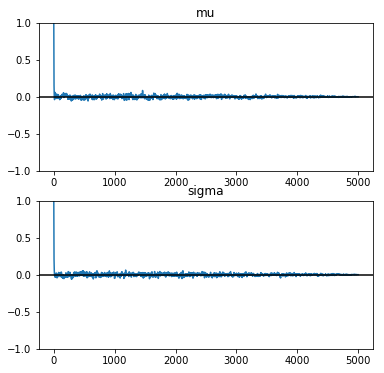

In [10]:
display1.autocorrelations()

In [12]:
#display1.normalised = True
#display1.chains()

In [13]:
#display1.distributions()

##### Run Rosenthal adaptive sampler with scaling during burn-in; proposal-  random-walk Metropoli-Hastings mixture.

In [11]:
X0 = S1.MEP_samples
N2 = 100000 # samples required
M2 = 1000 # notify every #
lag = 50 # adjustment lag
# Initialise Proposer
proposer2 = RWMHProposal(cn.logPosterior, verbose=True)
# Initialise Sampler
sampler2 = RosenthalAdaptiveSampler(samples_draw=N2, 
                            notify_every=M2, burnin_fraction=0.5, 
                            burnin_lag=50, model=cn.logPosterior,  
                            proposal=proposer2.propose_block_mixture,
                            verbose=True) 
sampler2.acceptance_limits = [0.1, 0.5]
sampler2.scale = 0.1
# Sample
np.random.seed(2)
S2 = sampler2.sample_block(X0)

Sampler initialised...
Iteration 50; Acceptance: 0.800000; Scale factor 1.100000: increased
Iteration 100; Acceptance: 0.720000; Scale factor 1.210000: increased
Iteration 150; Acceptance: 0.520000; Scale factor 1.331000: increased
Iteration 200; Acceptance: 0.640000; Scale factor 1.464100: increased
Iteration 250; Acceptance: 0.540000; Scale factor 1.610510: increased
Iteration 300; Acceptance: 0.580000; Scale factor 1.771561: increased
Iteration 350; Acceptance: 0.380000; Scale factor 1.771561: not changed
Iteration 400; Acceptance: 0.460000; Scale factor 1.771561: not changed
Iteration 450; Acceptance: 0.360000; Scale factor 1.771561: not changed
Iteration 500; Acceptance: 0.200000; Scale factor 1.771561: not changed
Iteration 550; Acceptance: 0.360000; Scale factor 1.771561: not changed
Iteration 600; Acceptance: 0.280000; Scale factor 1.771561: not changed
Iteration 650; Acceptance: 0.340000; Scale factor 1.771561: not changed
Iteration 700; Acceptance: 0.360000; Scale factor 1.77

C:\BICME\bicme\tests\case_normal.py:31: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(scipy.stats.norm.pdf(self.data, X[0], X[1])))


Iteration 4900; Acceptance: 0.100000; Scale factor 0.941480: not changed
Iteration 4950; Acceptance: 0.200000; Scale factor 0.941480: not changed
Iteration 5000; Acceptance: 0.220000; Scale factor 0.941480: not changed
5.0 %
Iteration 5050; Acceptance: 0.180000; Scale factor 0.941480: not changed
Iteration 5100; Acceptance: 0.160000; Scale factor 0.941480: not changed
Iteration 5150; Acceptance: 0.180000; Scale factor 0.941480: not changed
Iteration 5200; Acceptance: 0.180000; Scale factor 0.941480: not changed
Iteration 5250; Acceptance: 0.120000; Scale factor 0.941480: not changed
Iteration 5300; Acceptance: 0.160000; Scale factor 0.941480: not changed
Iteration 5350; Acceptance: 0.140000; Scale factor 0.941480: not changed
Iteration 5400; Acceptance: 0.120000; Scale factor 0.941480: not changed
Iteration 5450; Acceptance: 0.160000; Scale factor 0.941480: not changed
Iteration 5500; Acceptance: 0.220000; Scale factor 0.941480: not changed
Iteration 5550; Acceptance: 0.040000; Scale f

In [12]:
print('MEP index = ', S2.MEP_index)
print('MEP = ', S2.MEP)
print('MEP pars=', S2.MEP_samples)

MEP index =  84249
MEP =  -1118.18395026
MEP pars= [-0.26542056  9.78316701]


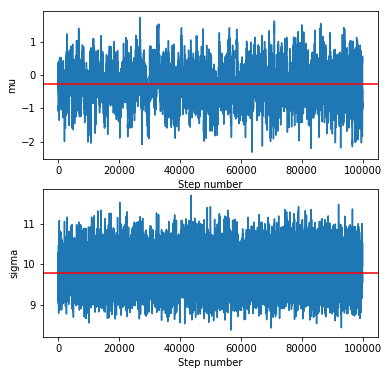

In [13]:
display2 = DisplayResults(S2, burnin=S2.N//2, names=['mu', 'sigma'])
#display.show_labels = False
display2.chains()

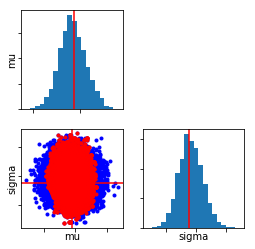

In [14]:
display2.corner()

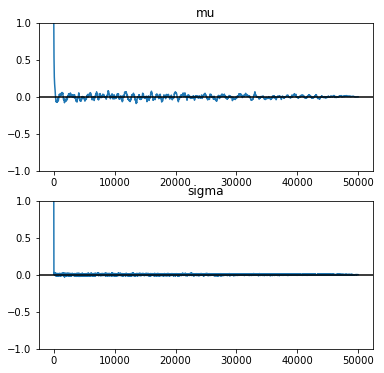

In [15]:
display2.autocorrelations()